# Confusion Matrix, Sensitivity & Specificity

- StatQuest Videos: 
  - Confusion Matrix: https://youtu.be/Kdsp6soqA7o
  - Sensitivity & Specificity: https://youtu.be/vP06aMoz4v8
- SKLearn Docs: https://scikit-learn.org/stable/modules/model_evaluation.html

The confusion matrix shows what your machine learning algorithm predicted vs. the known truth. It helps evaluate and compare different ML methods by summarizing their performance on test data.

**⚠️ Convention Note**: StatQuest videos use "Rows = predictions, Columns = actual truth" but **sklearn uses the opposite**: "Rows = actual truth, Columns = predictions". This notebook follows sklearn's convention.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=300, n_features=4, n_classes=2, 
                          n_redundant=0, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 4), (90, 4), (210,), (90,))

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_pred_lr.shape, y_pred_rf.shape

((90,), (90,))

### Binary Classification Confusion Matrix

**Important**: Sklearn uses **Rows = True labels, Columns = Predicted labels** (opposite of StatQuest videos!)

For 2-class problems (e.g., has disease / no disease) in sklearn:
- **True Negatives (TN)**: Top-left [0,0] - correctly predicted negative cases  
- **False Positives (FP)**: Top-right [0,1] - incorrectly predicted positive cases (Type I error)
- **False Negatives (FN)**: Bottom-left [1,0] - missed positive cases (Type II error)
- **True Positives (TP)**: Bottom-right [1,1] - correctly predicted positive cases

Diagonal elements = correct predictions, off-diagonal = mistakes

In [11]:
from sklearn.metrics import confusion_matrix

lr_cm = confusion_matrix(y_test, y_pred_lr)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print(f"Logistic Regression Confusion Matrix:")
print(lr_cm)
print(f"\nTP: {lr_cm[1,1]}, TN: {lr_cm[0,0]}, FP: {lr_cm[0,1]}, FN: {lr_cm[1,0]}")

print(f"\n\nRandom Forest Confusion Matrix:")
print(rf_cm)
print(f"\nTP: {rf_cm[1,1]}, TN: {rf_cm[0,0]}, FP: {rf_cm[0,1]}, FN: {rf_cm[1,0]}")

Logistic Regression Confusion Matrix:
[[40  2]
 [ 3 45]]

TP: 45, TN: 40, FP: 2, FN: 3


Random Forest Confusion Matrix:
[[41  1]
 [ 3 45]]

TP: 45, TN: 41, FP: 1, FN: 3


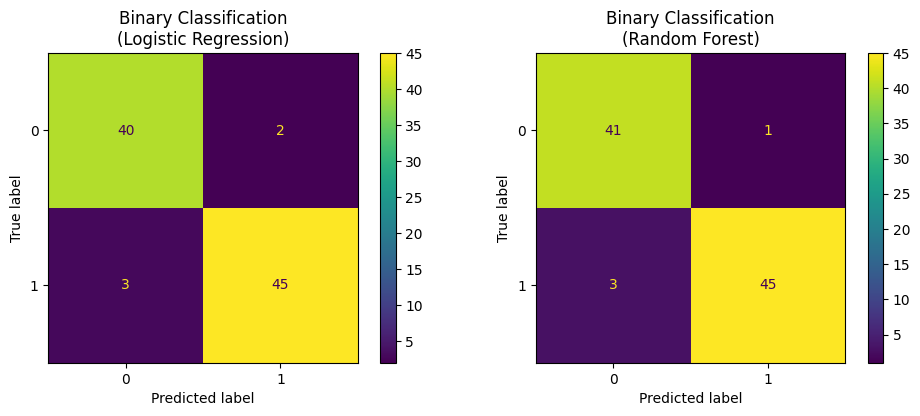

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=ax1)
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=ax2)

ax1.set_title('Binary Classification\n(Logistic Regression)')
ax2.set_title('Binary Classification\n(Random Forest)')

plt.tight_layout()
plt.show()

### Sensitivity and Specificity

**Sensitivity (Recall, True Positive Rate)**:
- What percentage of actual positives were correctly identified?
- Formula: `TP / (TP + FN)`
- High sensitivity = few false negatives (good at catching positives)

**Specificity (True Negative Rate)**:
- What percentage of actual negatives were correctly identified?  
- Formula: `TN / (TN + FP)`
- High specificity = few false positives (good at identifying negatives)

In [18]:
# Calculate sensitivity and specificity manually
def calc_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Random Forest metrics
rf_sens, rf_spec = calc_metrics(rf_cm)
print(f"Random Forest:")
print(f"  Sensitivity: {rf_sens:.3f} ({rf_sens:.1%} of positives correctly identified)")
print(f"  Specificity: {rf_spec:.3f} ({rf_spec:.1%} of negatives correctly identified)")

# Logistic Regression metrics  
lr_sens, lr_spec = calc_metrics(lr_cm)
print(f"\nLogistic Regression:")
print(f"  Sensitivity: {lr_sens:.3f} ({lr_sens:.1%} of positives correctly identified)")
print(f"  Specificity: {lr_spec:.3f} ({lr_spec:.1%} of negatives correctly identified)")

print(f"\nComparison:")
print(f"  Better sensitivity: {'Random Forest' if rf_sens > lr_sens else 'Logistic Regression'}")
print(f"  Better specificity: {'Random Forest' if rf_spec > lr_spec else 'Logistic Regression'}")

Random Forest:
  Sensitivity: 0.938 (93.8% of positives correctly identified)
  Specificity: 0.976 (97.6% of negatives correctly identified)

Logistic Regression:
  Sensitivity: 0.938 (93.8% of positives correctly identified)
  Specificity: 0.952 (95.2% of negatives correctly identified)

Comparison:
  Better sensitivity: Logistic Regression
  Better specificity: Random Forest


### Multi-Class Classification

For 3+ classes, confusion matrices get larger (e.g., 3x3 for 3 classes). Key differences:
- **No single sensitivity/specificity** for the entire matrix
- Calculate **separate metrics for each class** 
- For each class: treat it as "positive" and all others as "negative"
- Diagonal still shows correct predictions

In [22]:
# Create multi-class dataset (3 classes - like movie preferences)
X_multi, y_multi = make_classification(
    n_samples=400, 
    n_features=4, n_classes=3, 
    n_redundant=0, n_clusters_per_class=1, random_state=42
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, 
    y_multi, 
    test_size=0.3, 
    random_state=42
)

# Train model and get predictions
rf_multi = RandomForestClassifier(random_state=42).fit(X_train_m, y_train_m)
pred_multi = rf_multi.predict(X_test_m)

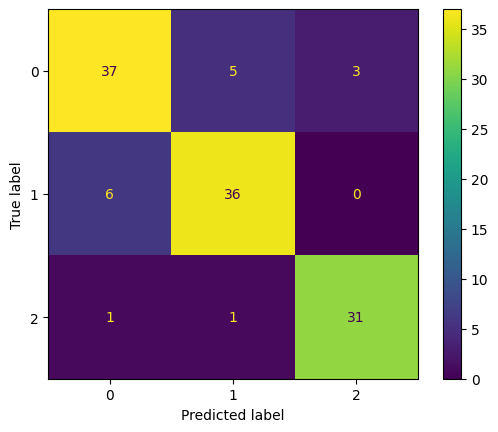

In [ ]:
# Multi-class confusion matrix
cm_multi = confusion_matrix(y_test_m, pred_multi)
_ = ConfusionMatrixDisplay.from_predictions(y_test_m, pred_multi)

In [28]:
# Calculate per-class sensitivity and specificity
class_names = ["Class 0", "Class 1", "Class 2"]
for i, class_name in enumerate(class_names):
    # For class i: TP = cm[i,i], FN = sum of row i except diagonal
    tp = cm_multi[i, i]
    fn = cm_multi[i, :].sum() - tp
    fp = cm_multi[:, i].sum() - tp  
    tn = cm_multi.sum() - tp - fn - fp
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\n{class_name}:")
    print(f"  Sensitivity: {sensitivity:.3f} ({sensitivity:.1%} of {class_name} correctly identified)")
    print(f"  Specificity: {specificity:.3f} ({specificity:.1%} of non-{class_name} correctly identified)")


Class 0:
  Sensitivity: 0.822 (82.2% of Class 0 correctly identified)
  Specificity: 0.907 (90.7% of non-Class 0 correctly identified)

Class 1:
  Sensitivity: 0.857 (85.7% of Class 1 correctly identified)
  Specificity: 0.923 (92.3% of non-Class 1 correctly identified)

Class 2:
  Sensitivity: 0.939 (93.9% of Class 2 correctly identified)
  Specificity: 0.966 (96.6% of non-Class 2 correctly identified)
